PyTorch version: 2.2.1+cu121
CUDA available: True
CUDA version: 12.1
Available GPUs: 1
GPU 0: NVIDIA GeForce RTX 3060 Laptop GPU


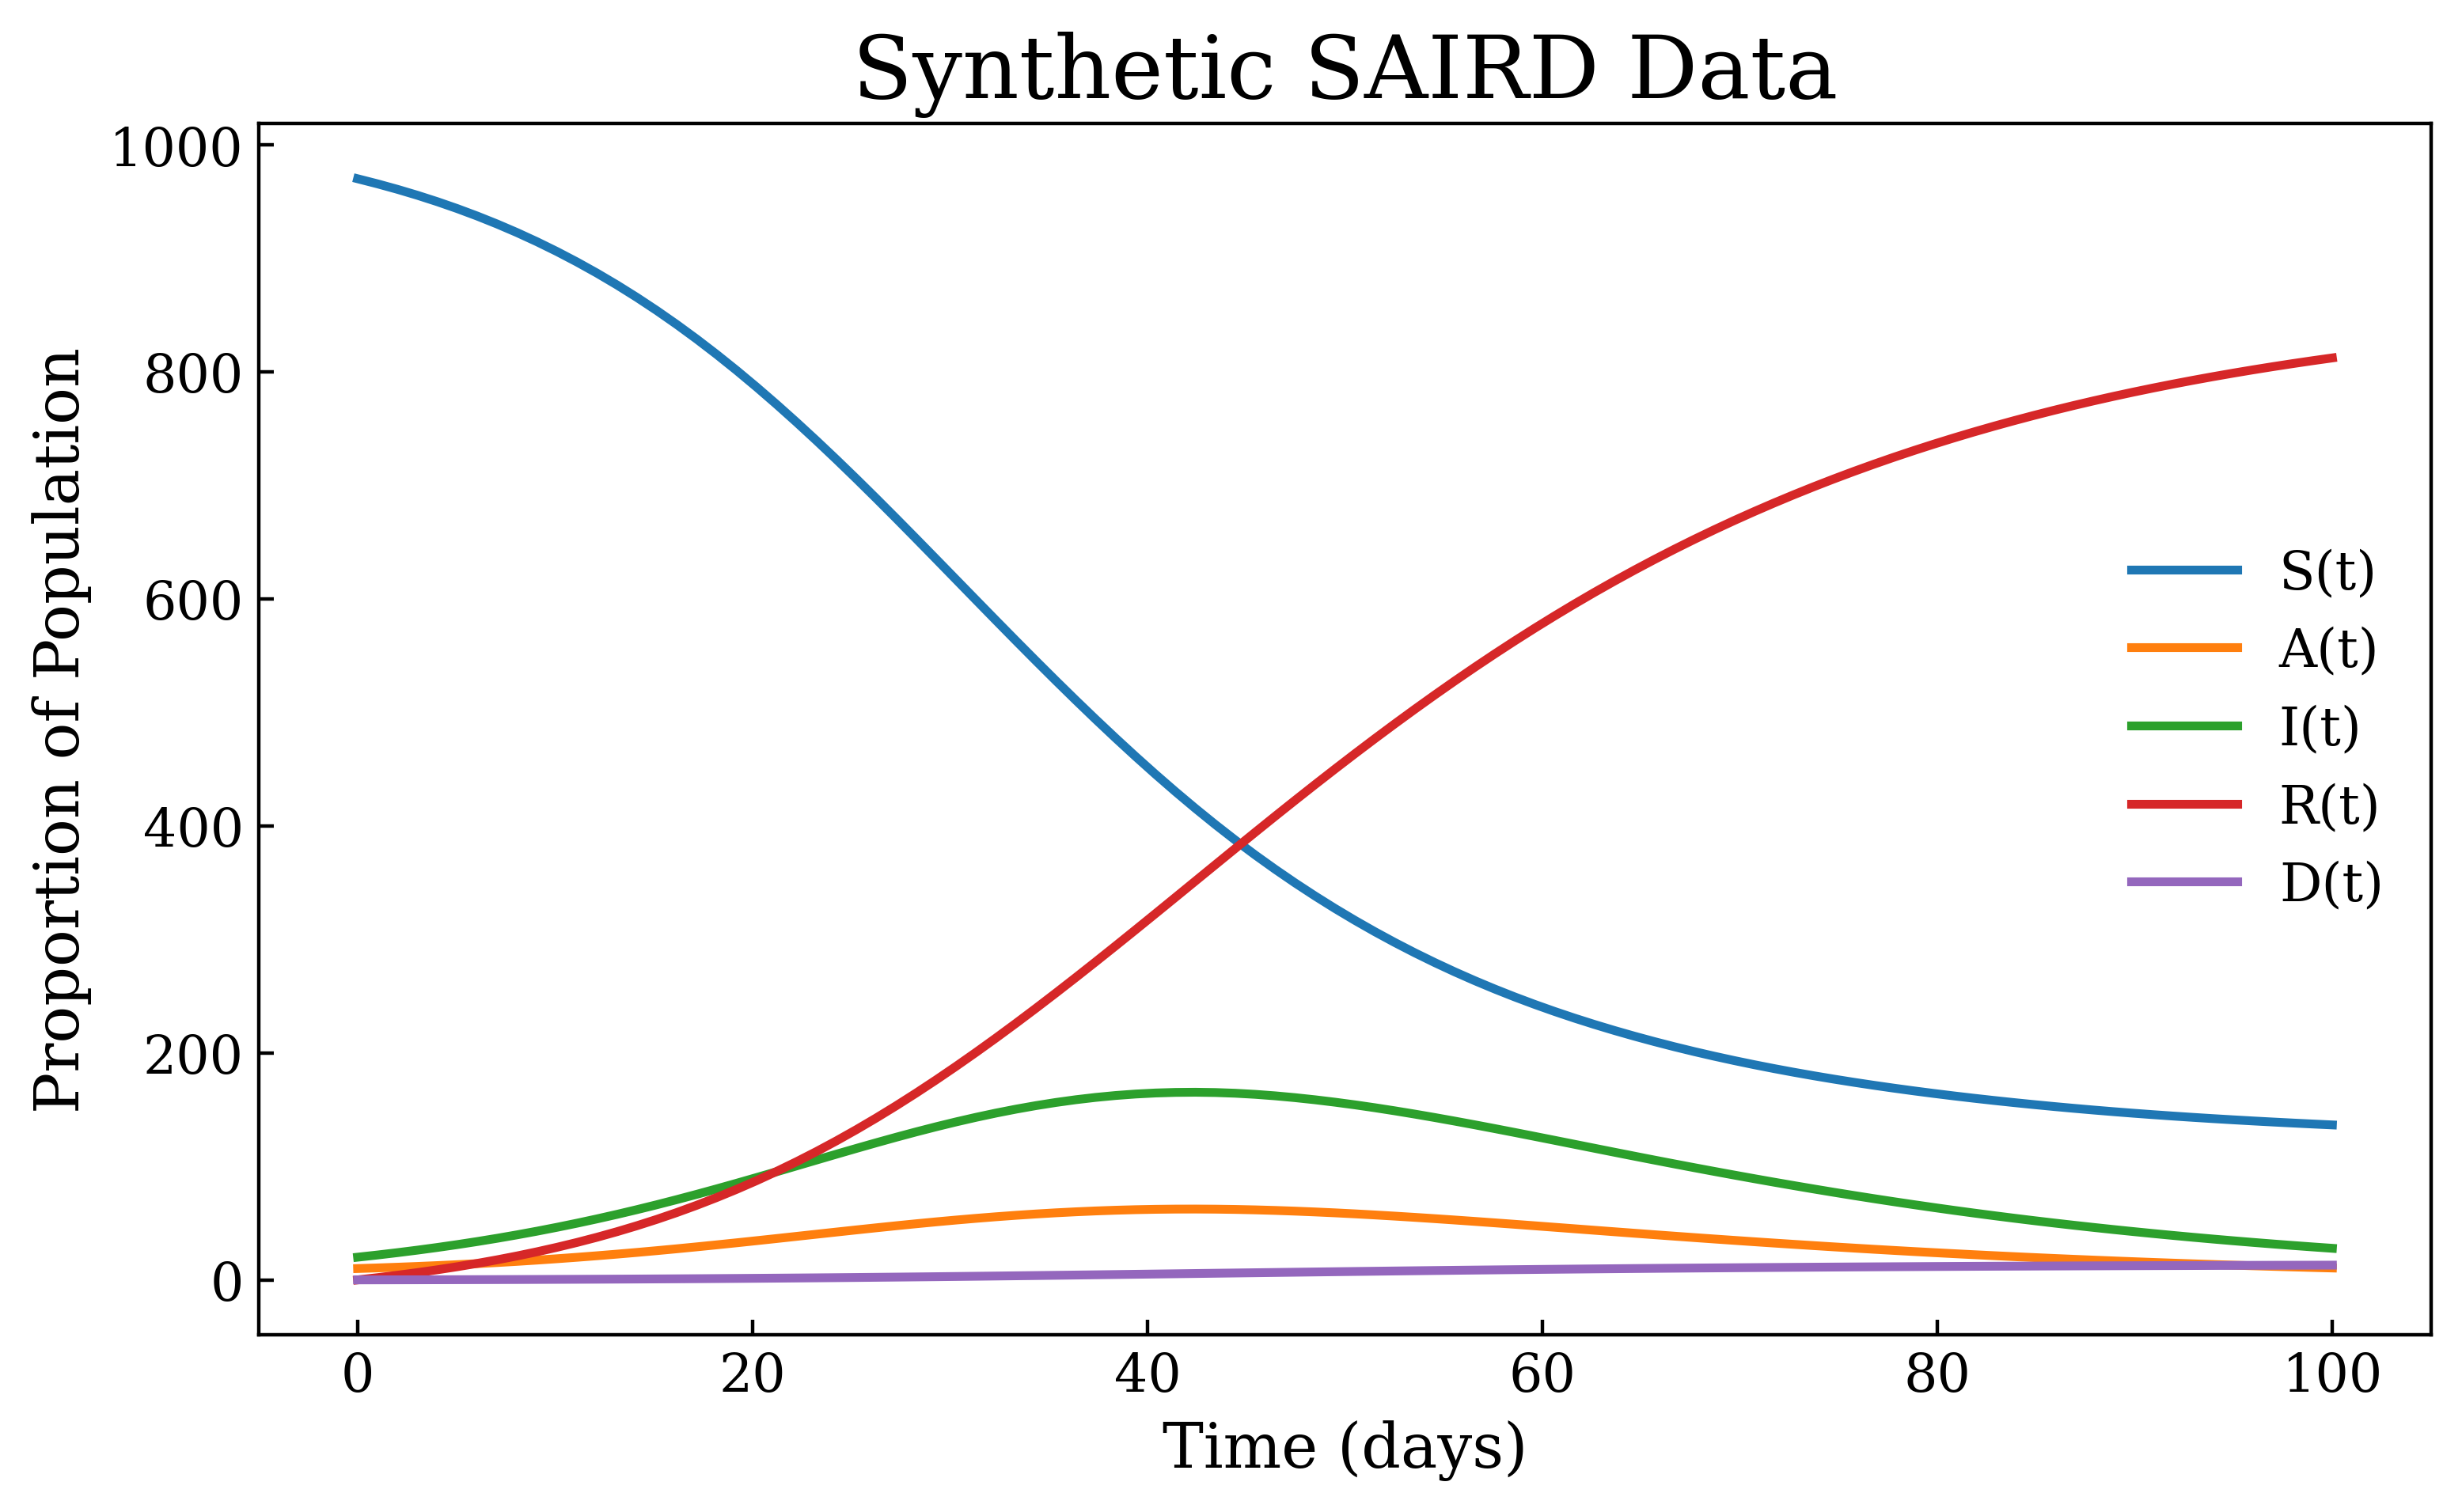

Epoch 0, Loss: 1.1190
Epoch 100, Loss: 0.0569
Epoch 200, Loss: 0.0468
Epoch 300, Loss: 0.0393
Epoch 400, Loss: 0.0324
Epoch 500, Loss: 0.0243
Epoch 600, Loss: 0.0134
Epoch 700, Loss: 0.0052
Epoch 800, Loss: 0.0027
Epoch 900, Loss: 0.0018
Epoch 1000, Loss: 0.0014
Epoch 1100, Loss: 0.0011
Epoch 1200, Loss: 0.0009
Epoch 1300, Loss: 0.0007
Epoch 1400, Loss: 0.0007
Epoch 1500, Loss: 0.0006
Epoch 1600, Loss: 0.0005
Epoch 1700, Loss: 0.0005
Epoch 1800, Loss: 0.0005
Epoch 1900, Loss: 0.0005
Epoch 2000, Loss: 0.0004
Epoch 2100, Loss: 0.0004
Epoch 2200, Loss: 0.0004
Epoch 2300, Loss: 0.0004
Epoch 2400, Loss: 0.0004
Epoch 2500, Loss: 0.0004
Epoch 2600, Loss: 0.0004
Epoch 2700, Loss: 0.0003
Epoch 2800, Loss: 0.0003
Epoch 2900, Loss: 0.0003
Epoch 3000, Loss: 0.0003
Epoch 3100, Loss: 0.0003
Epoch 3200, Loss: 0.0003
Epoch 3300, Loss: 0.0003
Epoch 3400, Loss: 0.0003
Epoch 3500, Loss: 0.0003
Epoch 3600, Loss: 0.0003
Epoch 3700, Loss: 0.0003
Epoch 3800, Loss: 0.0003
Epoch 3900, Loss: 0.0002
Epoch 4000, 

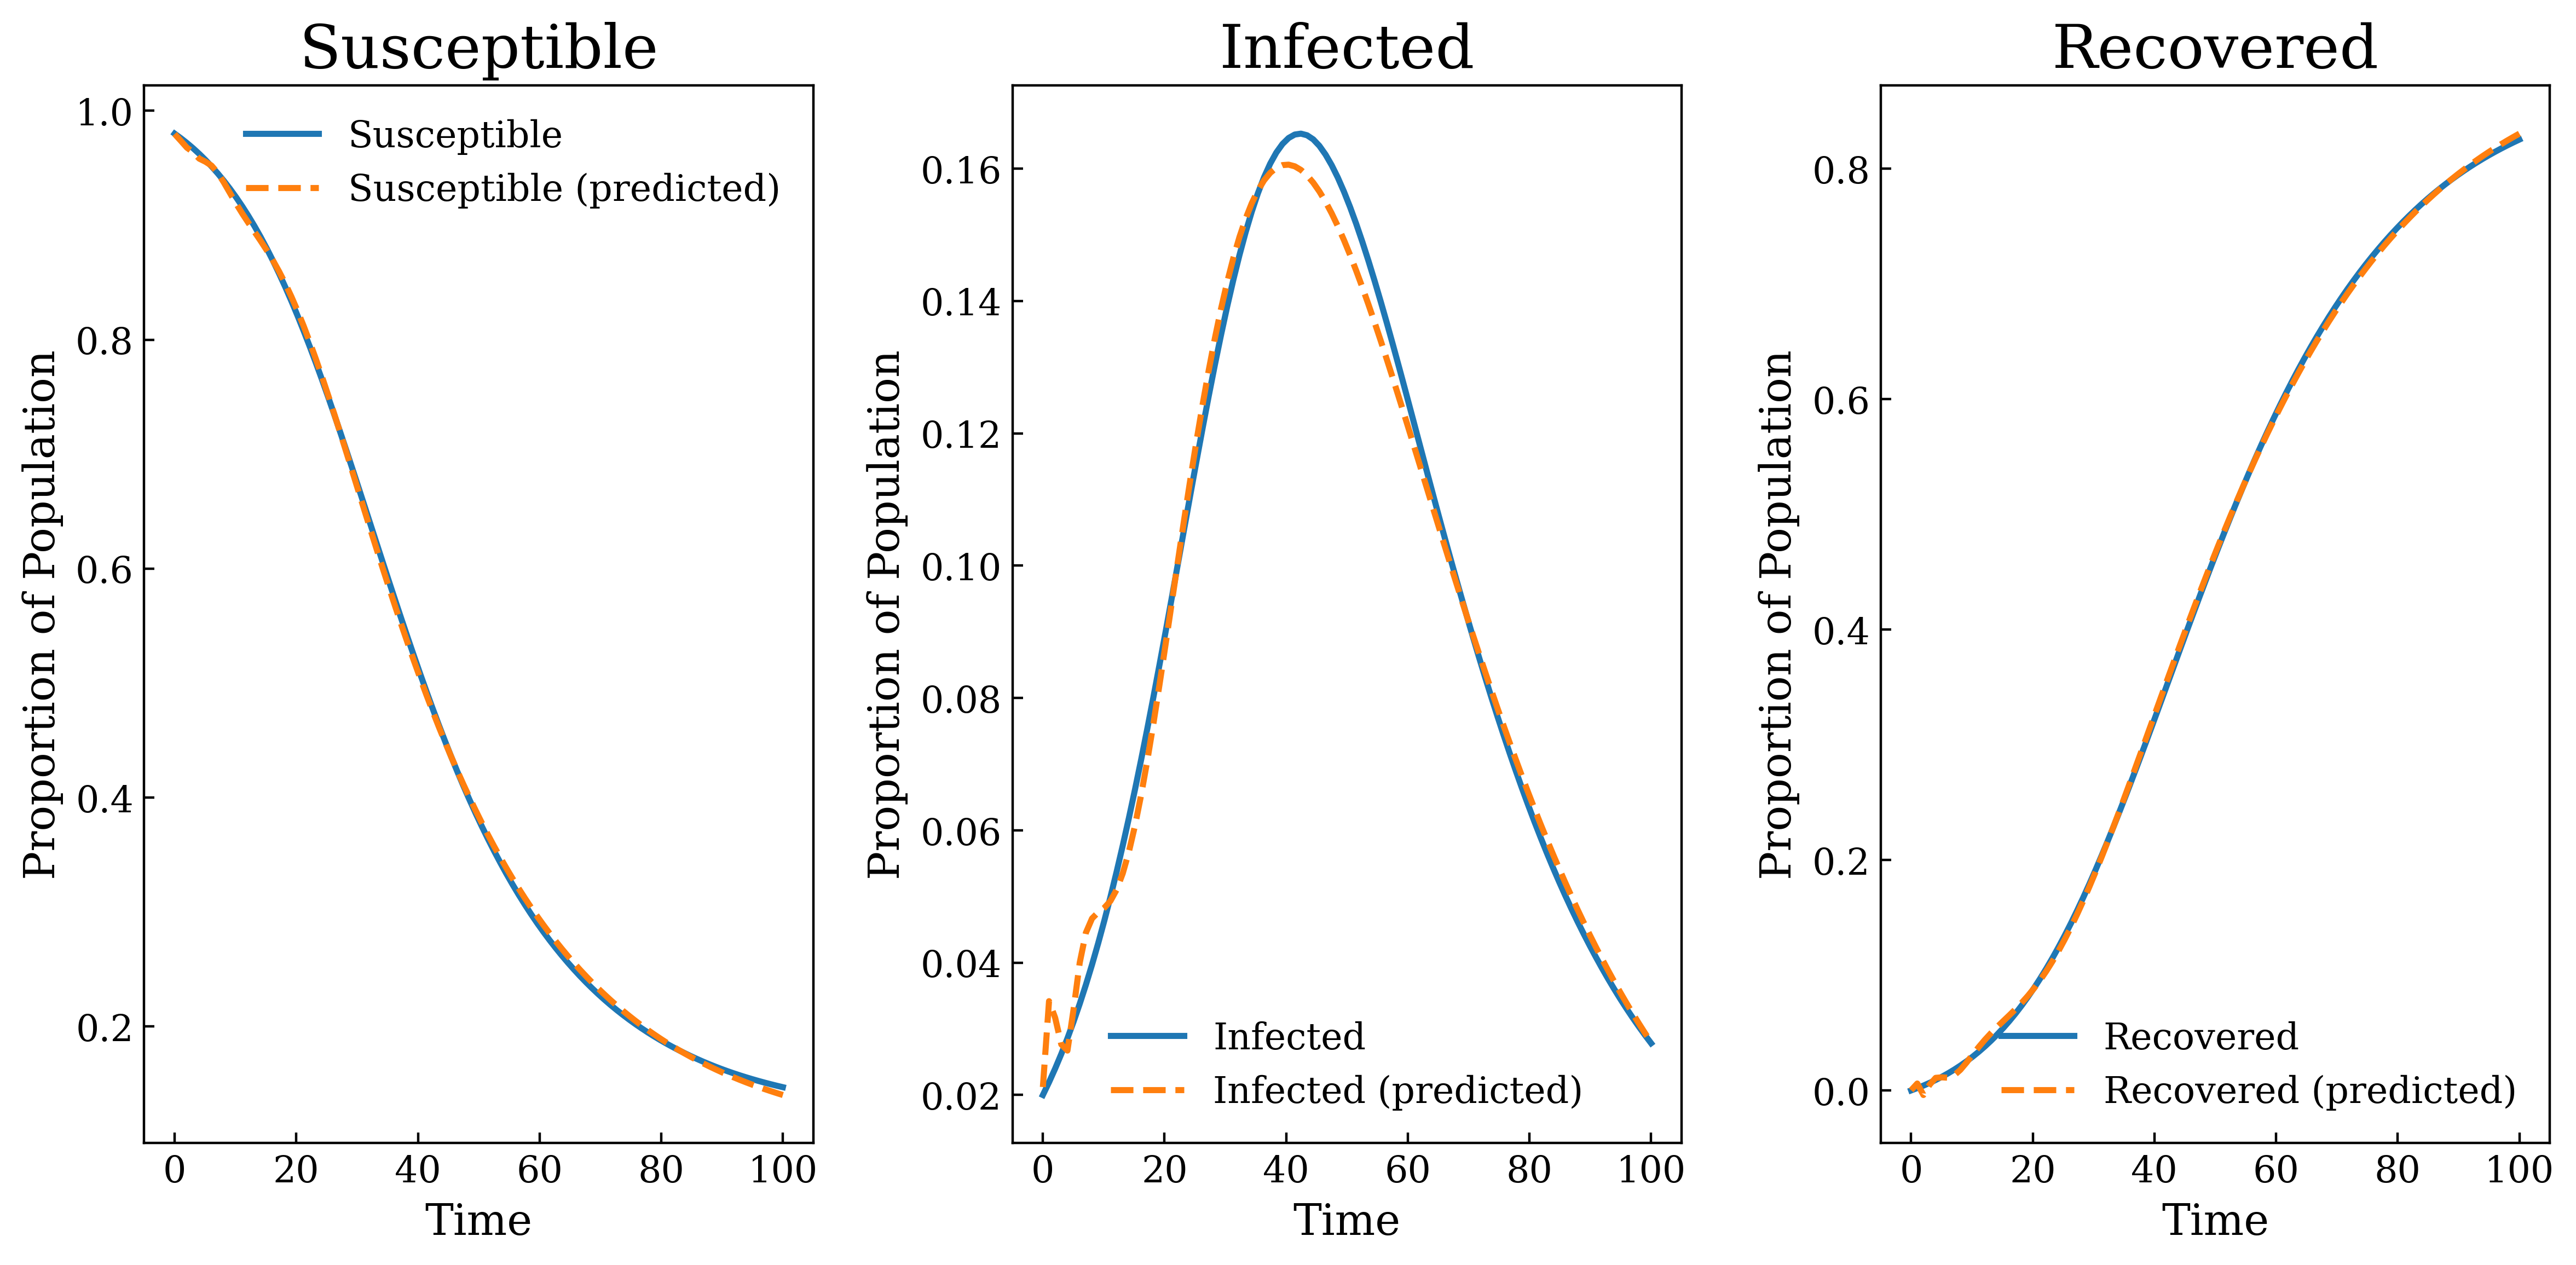

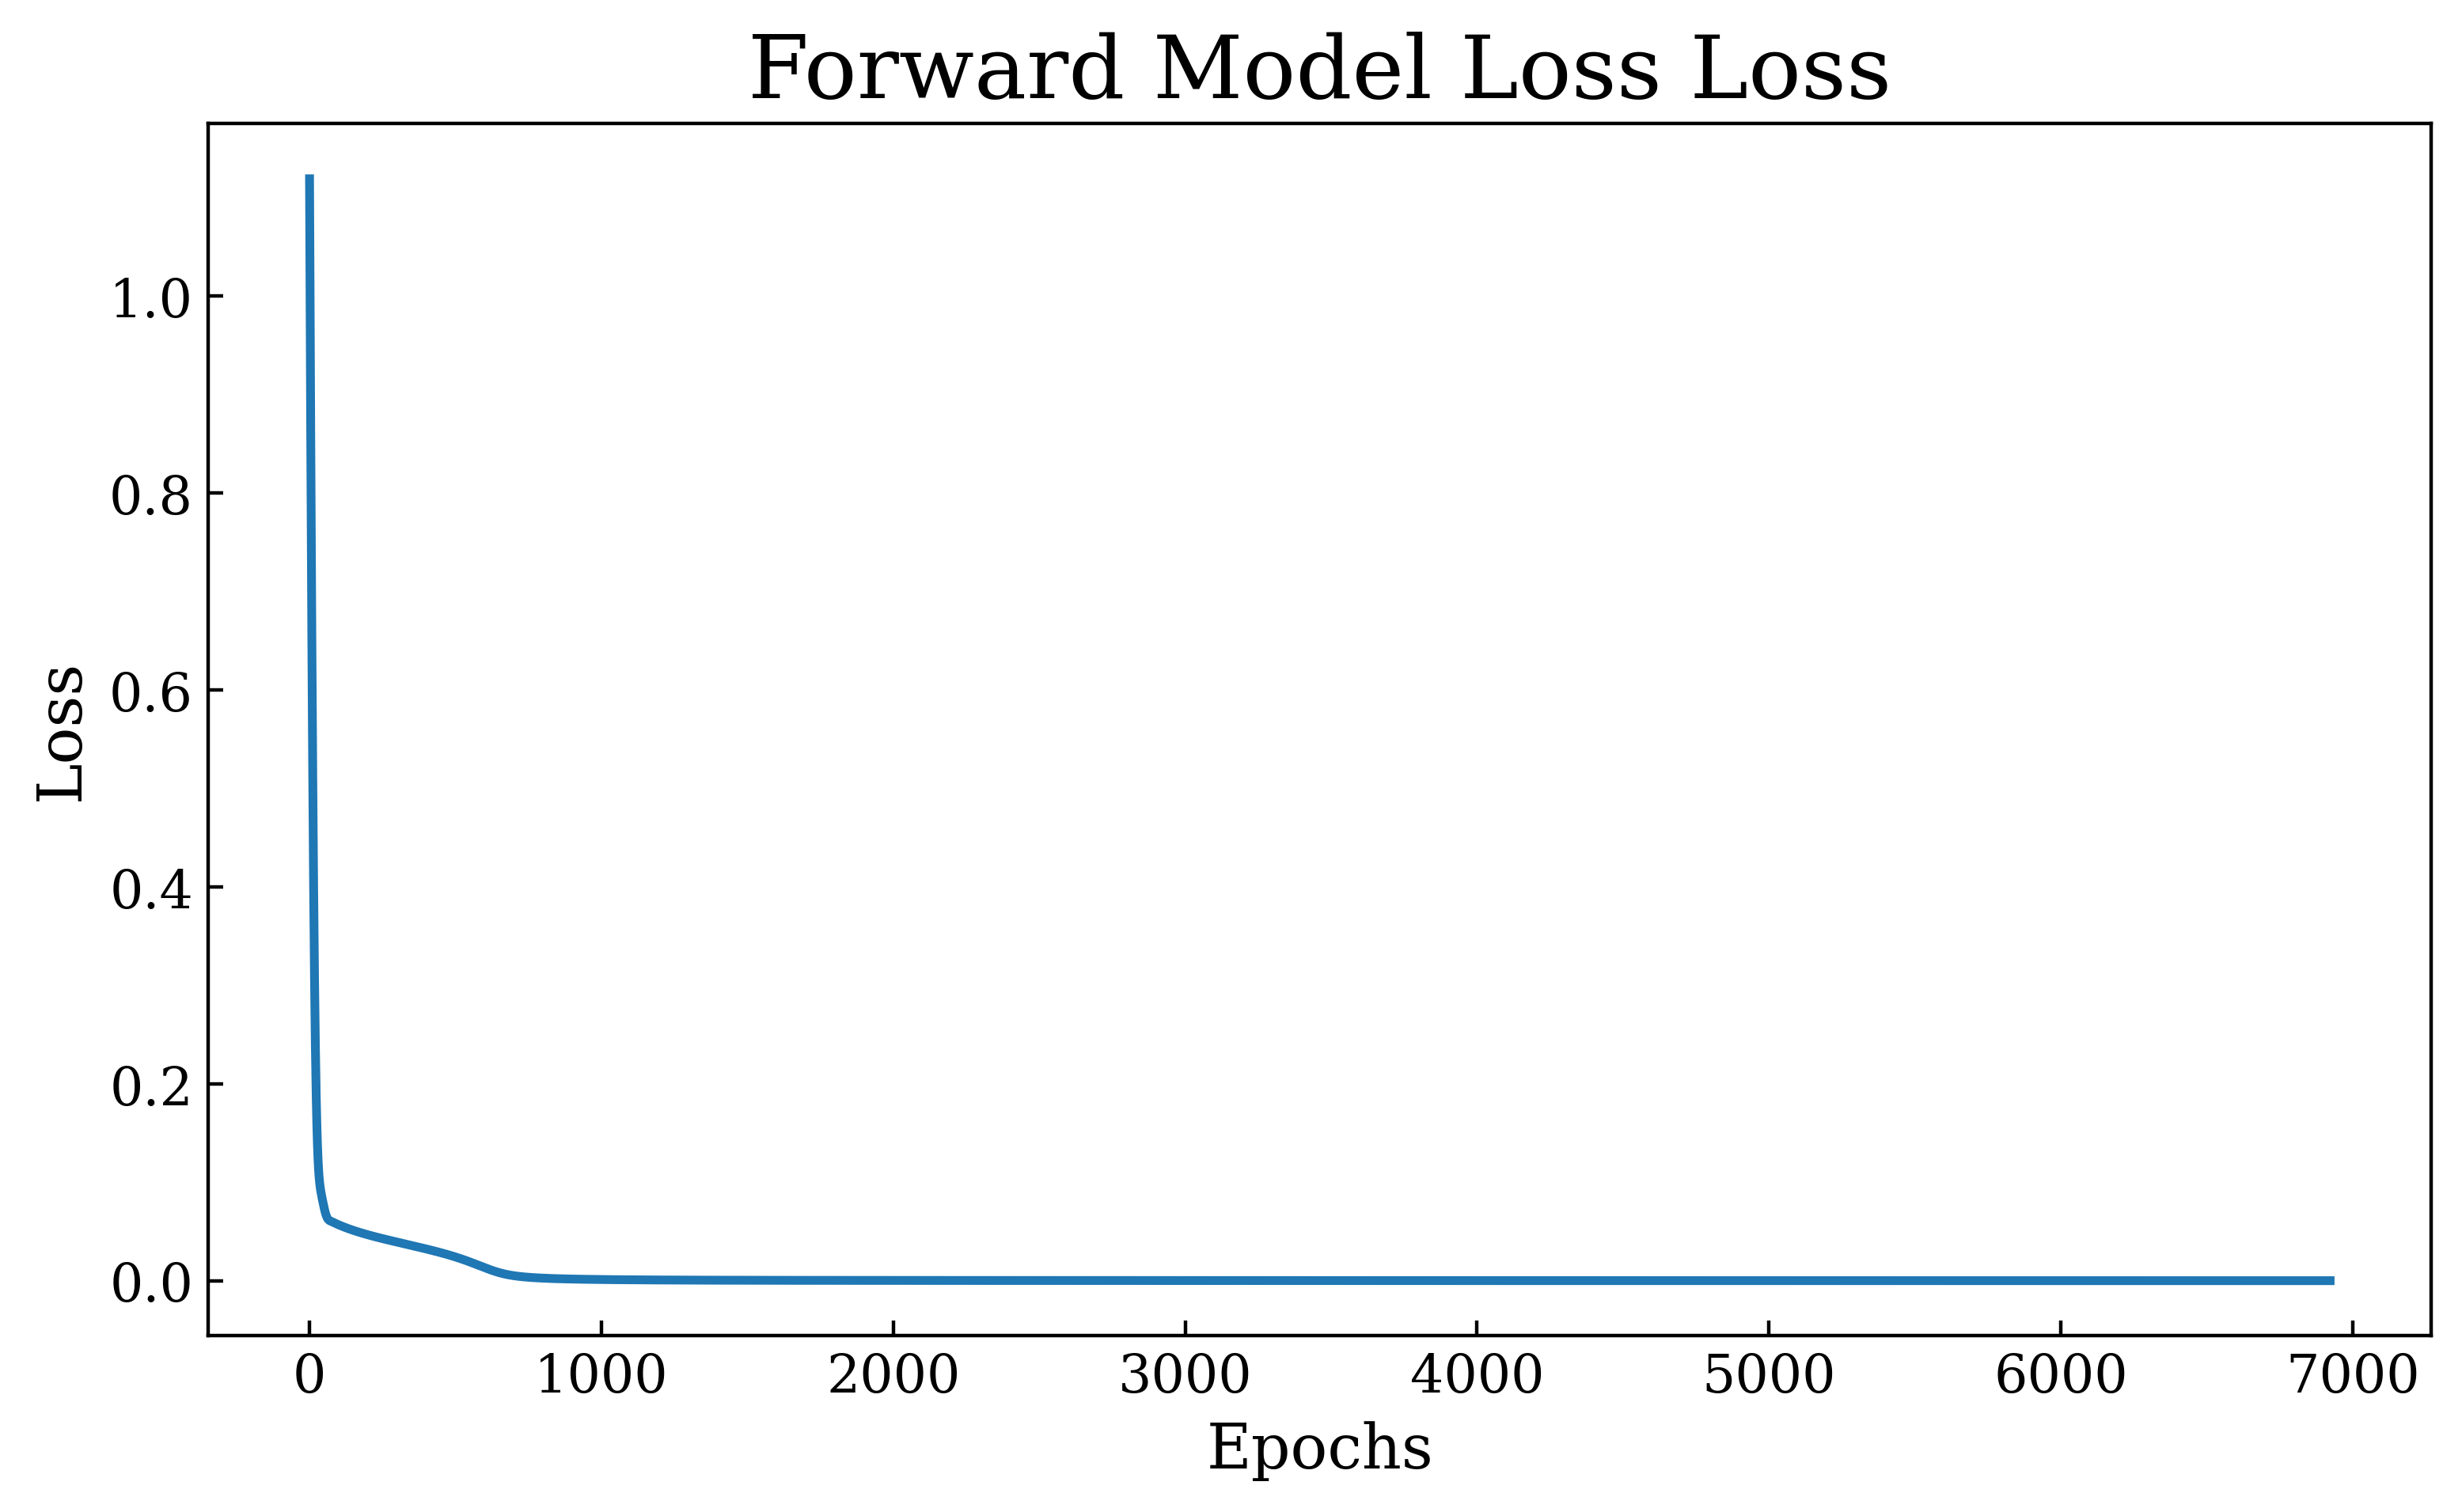

Epoch 0, Loss: 1.1190
Epoch 100, Loss: 0.0569
Epoch 200, Loss: 0.0467
Epoch 300, Loss: 0.0393
Epoch 400, Loss: 0.0324
Epoch 500, Loss: 0.0242
Epoch 600, Loss: 0.0134
Epoch 700, Loss: 0.0052
Epoch 800, Loss: 0.0027
Epoch 900, Loss: 0.0018
Epoch 1000, Loss: 0.0013
Epoch 1100, Loss: 0.0011
Epoch 1200, Loss: 0.0009
Epoch 1300, Loss: 0.0007
Epoch 1400, Loss: 0.0007
Epoch 1500, Loss: 0.0006
Epoch 1600, Loss: 0.0005
Epoch 1700, Loss: 0.0005
Epoch 1800, Loss: 0.0005
Epoch 1900, Loss: 0.0004
Epoch 2000, Loss: 0.0004
Epoch 2100, Loss: 0.0004
Epoch 2200, Loss: 0.0004
Epoch 2300, Loss: 0.0004
Epoch 2400, Loss: 0.0004
Epoch 2500, Loss: 0.0004
Epoch 2600, Loss: 0.0003
Epoch 2700, Loss: 0.0003
Epoch 2800, Loss: 0.0003
Epoch 2900, Loss: 0.0003
Epoch 3000, Loss: 0.0003
Epoch 3100, Loss: 0.0003
Epoch 3200, Loss: 0.0003
Epoch 3300, Loss: 0.0003
Epoch 3400, Loss: 0.0003
Epoch 3500, Loss: 0.0003
Epoch 3600, Loss: 0.0003
Epoch 3700, Loss: 0.0003
Epoch 3800, Loss: 0.0002
Epoch 3900, Loss: 0.0002
Epoch 4000, 

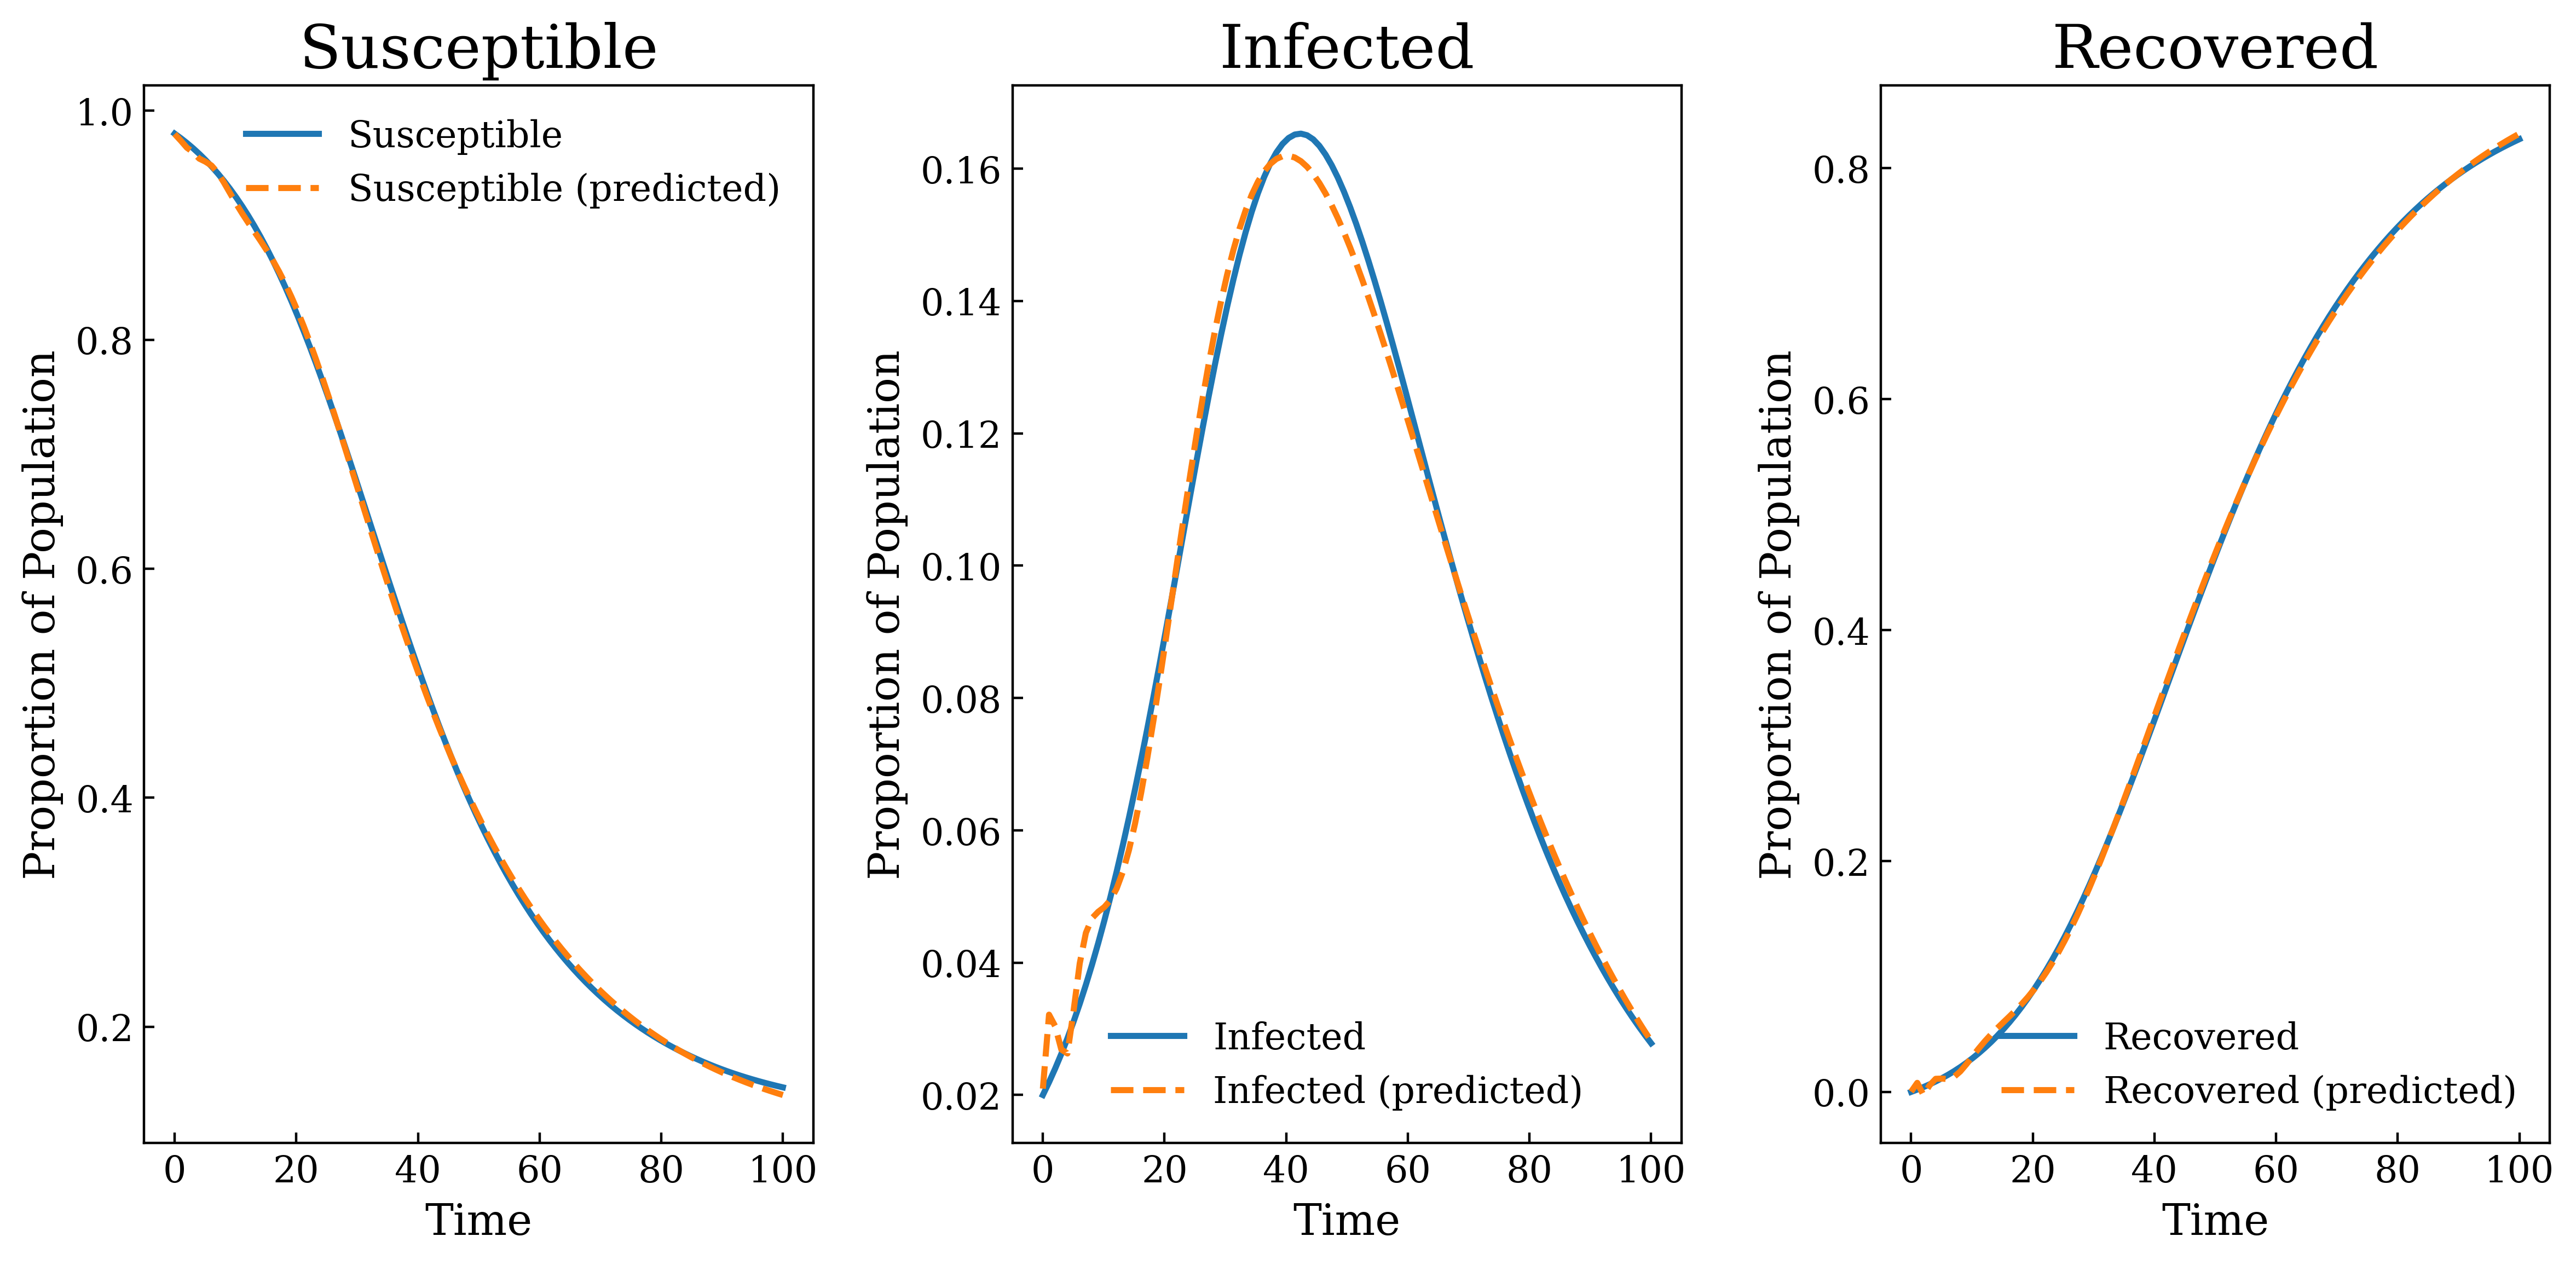

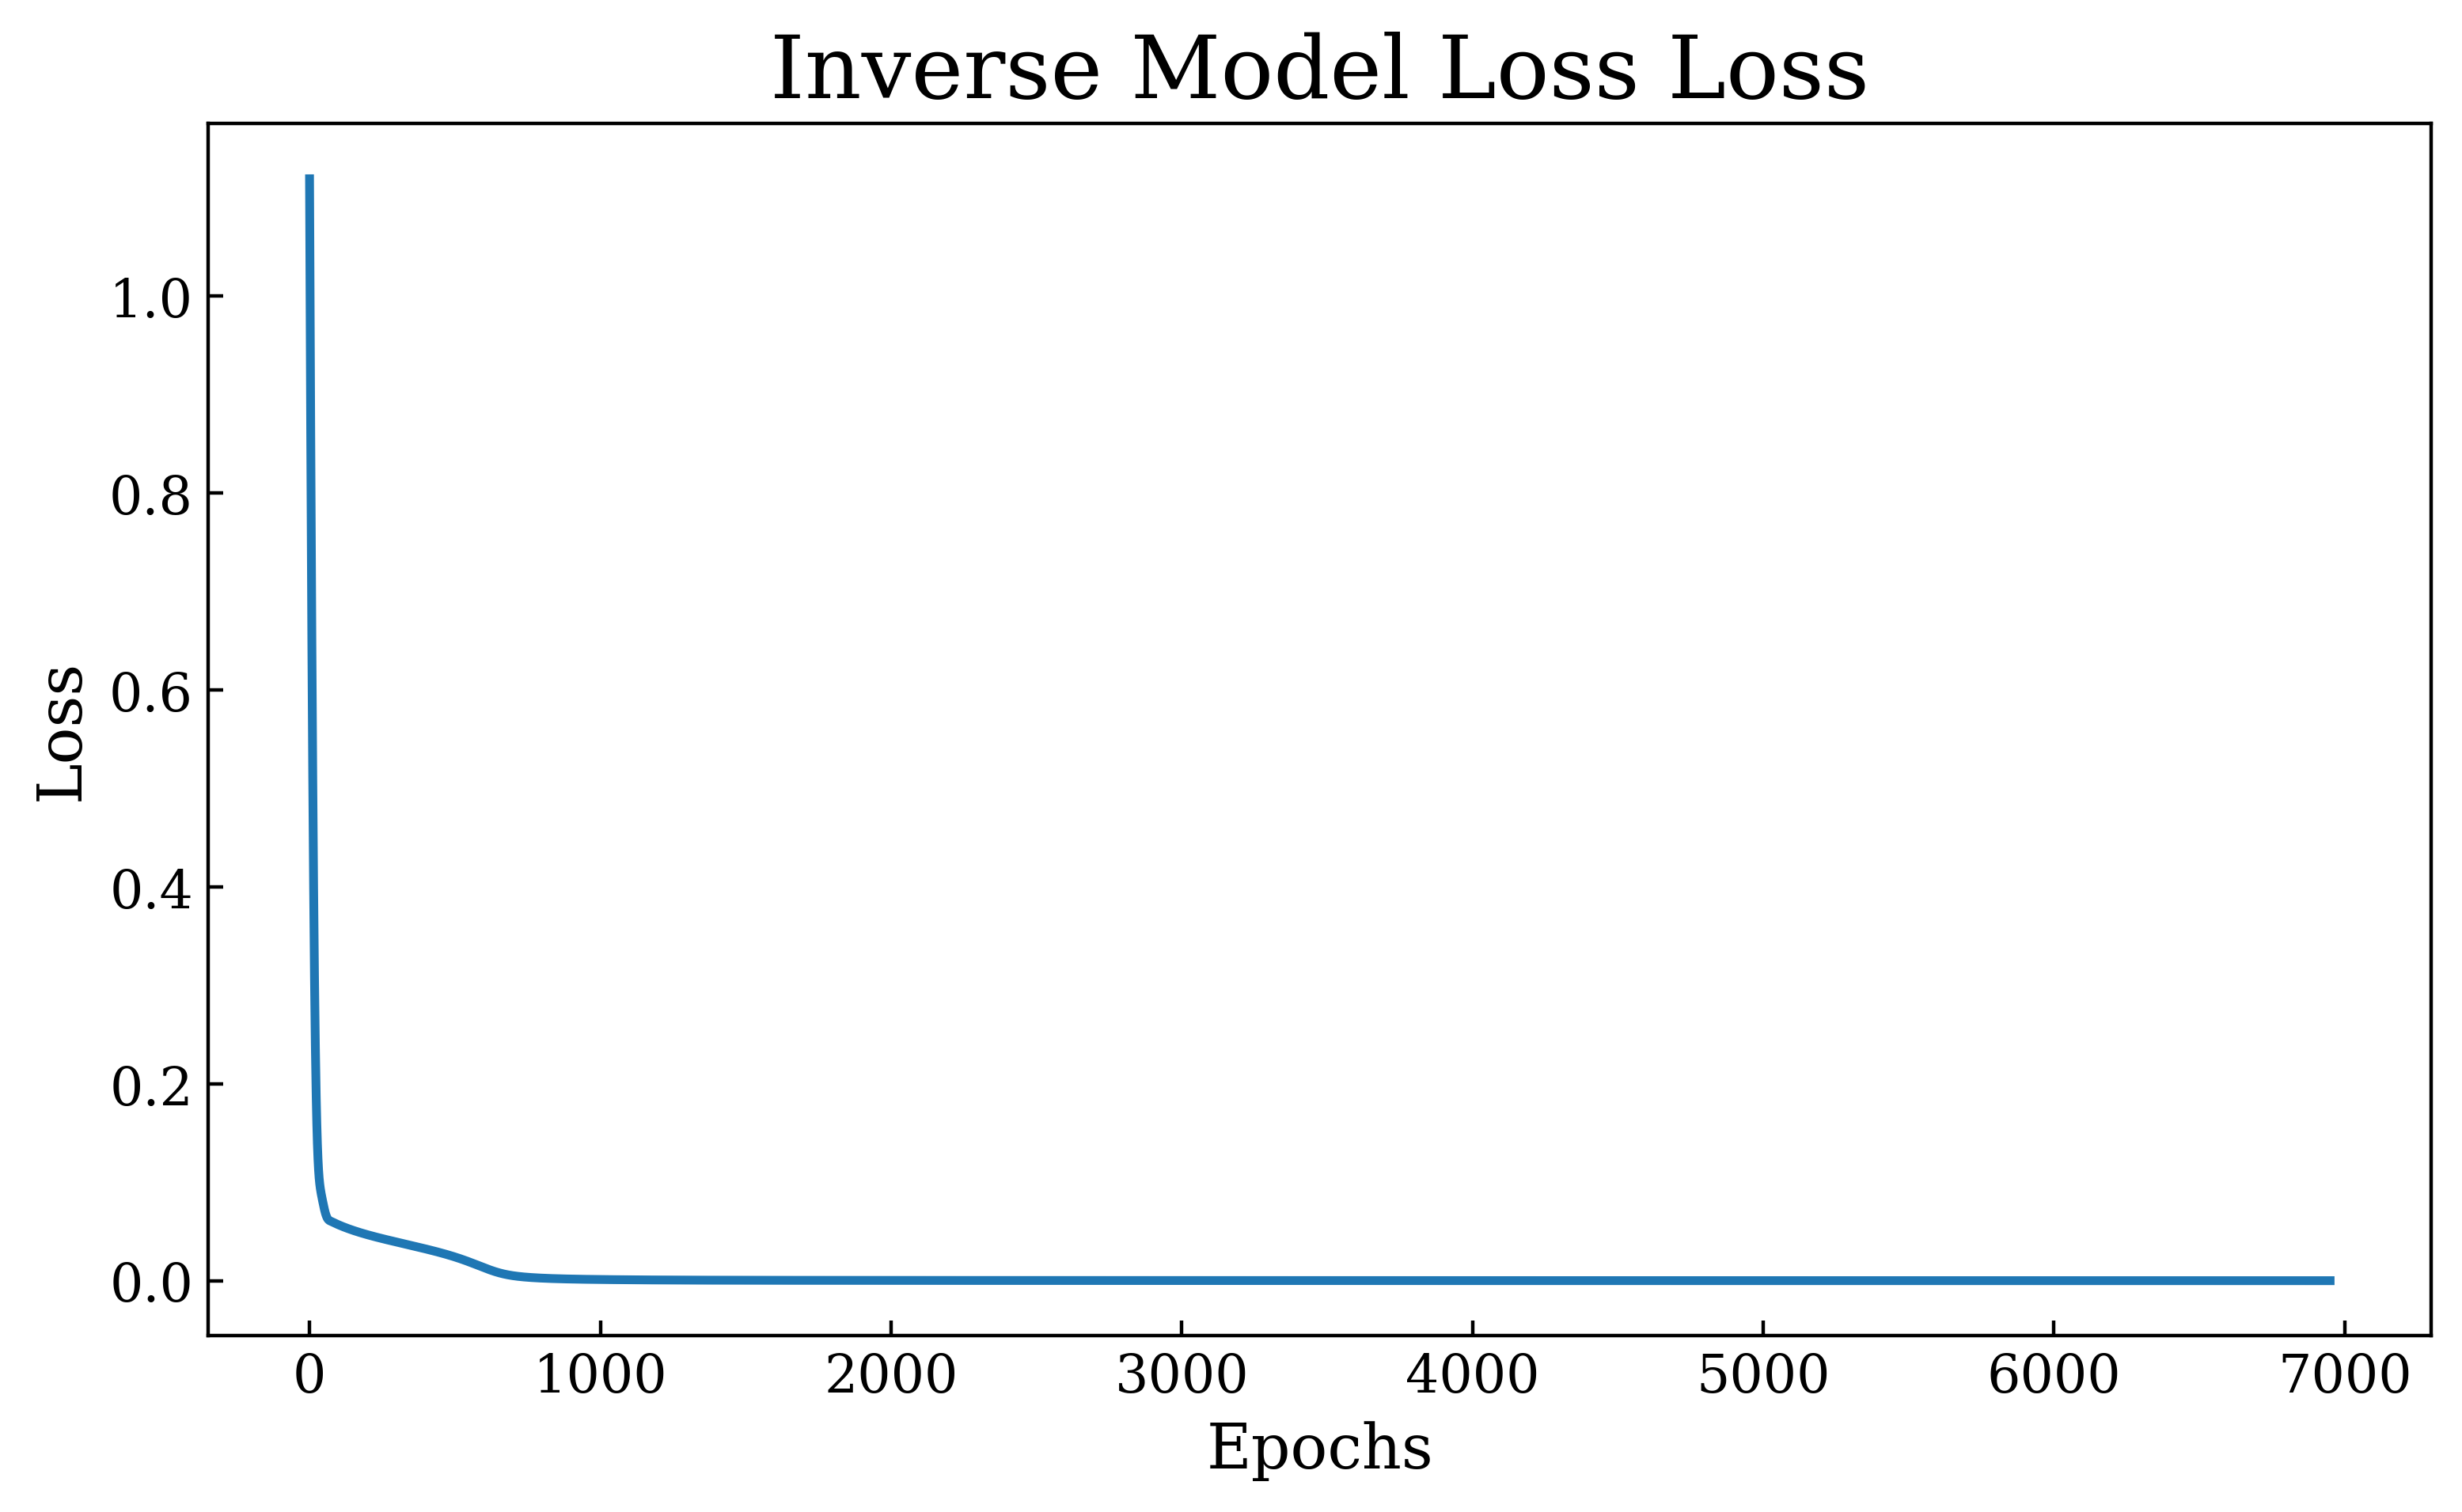

Predicted beta: 0.7112, Predicted gamma: 0.0452
MAE: 3.09, MSE: 13.54, RMSE: 3.68


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import mean_absolute_error, mean_squared_error
# runge-kutta method
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

def check_pytorch():
    # Print PyTorch version
    print(f"PyTorch version: {torch.__version__}")

    # Check CUDA availability
    cuda_available = torch.cuda.is_available()
    print(f"CUDA available: {cuda_available}")

    if cuda_available:
        # Print CUDA version
        print(f"CUDA version: {torch.version.cuda}")
        
        # List available GPUs
        gpu_count = torch.cuda.device_count()
        print(f"Available GPUs: {gpu_count}")
        for i in range(gpu_count):
            print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
    else:
        print("CUDA not available. PyTorch will run on CPU.")
        
check_pytorch()

# Set up matplotlib
plt.rcParams.update({
    # Font settings for clarity and compatibility with academic publications
    "font.family": "serif",  # Consistent font family
    # "font.serif": ["Times", "Computer Modern Roman"],  # Preferred serif fonts
    "font.size": 14,  # Base font size for better readability
    "text.usetex": False,  # Enable LaTeX for text rendering for a professional look

    # Figure aesthetics & size for detailed visuals and fit on publication pages
    "figure.figsize": (8, 5),  # Adjusted figure size for a balance between detail and fit
    "figure.facecolor": "white",  # White figure background for clean print
    "figure.autolayout": True,  # Enable automatic layout adjustments
    "figure.dpi": 400,  # High resolution figures
    "savefig.dpi": 400,  # High resolution saving settings
    "savefig.format": "pdf",  # Save figures in PDF format for publications
    "savefig.bbox": "tight",  # Tight bounding box around figures

    # Axes aesthetics for clarity and precision
    "axes.labelsize": 14,  # Clear labeling with larger font size
    "axes.titlesize": 20,  # Prominent titles for immediate recognition
    "axes.facecolor": "white",  # White axes background

    # Legend aesthetics for distinguishing plot elements
    "legend.fontsize": 12,  # Readable legend font size
    "legend.frameon": False,  # No frame around legend for cleaner look
    "legend.loc": "best",  # Optimal legend positioning

    # Line aesthetics for clear visual distinctions
    "lines.linewidth": 2,  # Thicker lines for visibility
    "lines.markersize": 8,  # Slightly smaller markers for balance

    # Tick label sizes for readability
    "xtick.labelsize": 12, 
    "ytick.labelsize": 12,
    "xtick.direction": "in",  # Ticks inside the plot
    "ytick.direction": "in",  # Ticks inside the plot
})


# Set random seed for reproducibility
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Device setup for CUDA or CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# SAIRD Model Parameters and Initial Conditions as per the paper
params = {
    "rho1": 0.80,
    "rho2": 0.29,
    "alpha": 0.1,
    "beta": 0.17,
    "gamma": 1 / 16,
    "theta": 0.001,
    "N": 1000,
}
initial_conditions = [970, 10, 20, 0, 0]  # [S0, A0, I0, R0, D0]


# Define the SAIRD model differential equations
def saird_model(t, y, params):
    S, A, I, R, D = y
    N = params["N"]
    dSdt = -params["beta"] * I * S / N - params["alpha"] * A * S / N
    dAdt = (
        params["rho2"] * params["beta"] * I * S / N
        + (1 - params["rho1"]) * params["alpha"] * A * S / N
        - params["gamma"] * A
        - params["theta"] * A
    )
    dIdt = (
        (1 - params["rho2"]) * params["beta"] * I * S / N
        + params["rho1"] * params["alpha"] * A * S / N
        - params["gamma"] * I
        - params["theta"] * I
    )
    dRdt = params["gamma"] * (I + A)
    dDdt = params["theta"] * (I + A)
    return [dSdt, dAdt, dIdt, dRdt, dDdt]


# Generate synthetic SAIRD data
t_span = [0, 100]  # 100 days
t_eval = np.linspace(t_span[0], t_span[1], 100)  # 100 data points
saird_solution = solve_ivp(
    saird_model,
    t_span,
    initial_conditions,
    args=(params,),
    t_eval=t_eval,
    method="RK45",
)

# Plot the SAIRD data
plt.plot(saird_solution.t, saird_solution.y[0], label="S(t)")
plt.plot(saird_solution.t, saird_solution.y[1], label="A(t)")
plt.plot(saird_solution.t, saird_solution.y[2], label="I(t)")
plt.plot(saird_solution.t, saird_solution.y[3], label="R(t)")
plt.plot(saird_solution.t, saird_solution.y[4], label="D(t)")
plt.xlabel("Time (days)")
plt.ylabel("Proportion of Population")
plt.title("Synthetic SAIRD Data")
plt.legend()
plt.savefig("../../reports/figures/saird_data.pdf")
plt.show()

# Extract SIR data from SAIRD solution
S_saird, A_saird, I_saird, R_saird, D_saird = saird_solution.y
S_sir = S_saird + A_saird  # S compartment for SIR
R_sir = R_saird + D_saird  # R compartment for SIR
I_sir = I_saird

# normalize the data
S_sir /= params["N"]
I_sir /= params["N"]
R_sir /= params["N"]

# Convert the data to PyTorch tensors
t_data = torch.tensor(t_eval, dtype=torch.float32).reshape(-1, 1).to(device)
S_data = torch.tensor(S_sir, dtype=torch.float32).reshape(-1, 1).to(device)
I_data = torch.tensor(I_sir, dtype=torch.float32).reshape(-1, 1).to(device)
R_data = torch.tensor(R_sir, dtype=torch.float32).reshape(-1, 1).to(device)
SIR_tensor = torch.cat([S_data, I_data, R_data], 1)
t_data.requires_grad = True

# SIR Neural Network Model
class SIRNet(nn.Module):
    def __init__(self, inverse=False, init_beta=None, init_gamma=None, retrain_seed=42, num_layers=4, hidden_neurons=20):
        super(SIRNet, self).__init__()
        self.retrain_seed = retrain_seed
        layers = []
        layers.append(nn.Linear(1, hidden_neurons))
        layers.append(nn.Tanh())
        for _ in range(num_layers - 1):
            layers.append(nn.Linear(hidden_neurons, hidden_neurons))
            layers.append(nn.Tanh())
        layers.append(nn.Linear(hidden_neurons, 3))
        self.net = nn.Sequential(*layers)

        # Adjustments for inverse model with customizable initial values
        if inverse:
            self._beta = nn.Parameter(torch.tensor([init_beta if init_beta is not None else torch.rand(1)], device=device), requires_grad=True)
            self._gamma = nn.Parameter(torch.tensor([init_gamma if init_gamma is not None else torch.rand(1)], device=device), requires_grad=True)
        else:
            self._beta = None
            self._gamma = None

        # Initialize the network weights
        self.init_xavier()

    def forward(self, t):
        return self.net(t)

    # Getter for beta to be between 0.1 and 1.0
    @property
    def beta(self):
        return torch.sigmoid(self._beta) * 0.9 + 0.1 if self._beta is not None else None

    # for gamma to be between 0.01 and 0.1
    @property
    def gamma(self):
        return torch.sigmoid(self._gamma) * 0.09 + 0.01 if self._gamma is not None else None
    

    # Initialize the neural network with Xavier Initialization
    def init_xavier(self):
        torch.manual_seed(self.retrain_seed)

        def init_weights(m):
            if isinstance(m, nn.Linear):
                g = nn.init.calculate_gain("tanh")
                nn.init.xavier_uniform_(m.weight, gain=g)
                if m.bias is not None:
                    m.bias.data.fill_(0)

        self.apply(init_weights)


# loss function for both forward and inverse problems
def sir_loss(model, model_output, SIR_tensor, t_tensor, N, beta=None, gamma=None):
    S_pred, I_pred, R_pred = model_output[:, 0], model_output[:, 1], model_output[:, 2]
    
    S_t = torch.autograd.grad(S_pred, t_tensor, torch.ones_like(S_pred), create_graph=True)[0]
    I_t = torch.autograd.grad(I_pred, t_tensor, torch.ones_like(I_pred), create_graph=True)[0]
    R_t = torch.autograd.grad(R_pred, t_tensor, torch.ones_like(R_pred), create_graph=True)[0]

    if beta is None:  # Use model's parameters for inverse problem
        beta, gamma = model.beta, model.gamma

    dSdt = -(beta * S_pred * I_pred) / N
    dIdt = (beta * S_pred * I_pred) / N - gamma * I_pred
    dRdt = gamma * I_pred

    loss = torch.mean((S_t - dSdt) ** 2) + torch.mean((I_t - dIdt) ** 2) + torch.mean((R_t - dRdt) ** 2)
    loss += torch.mean((model_output - SIR_tensor) ** 2)  # Data fitting loss
    return loss

# Early stopping class
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=3, verbose=False, delta=0):
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.counter = 0

    def __call__(self, val_loss):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.counter = 0
            
def train(model, t_tensor, SIR_tensor, epochs=1000, lr=0.001, N=None, beta=None, gamma=None):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    scheduler = ReduceLROnPlateau(optimizer, 'min', factor=0.5, patience=5)
    early_stopping = EarlyStopping(patience=10, verbose=True)
    
    losses = []
    
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        
        # Forward pass
        model_output = model(t_tensor)
        
        # Loss calculation
        loss = sir_loss(model, model_output, SIR_tensor, t_tensor, N, beta, gamma)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        scheduler.step(loss)
        
        # append the loss
        losses.append(loss.item())
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.4f}")
        
        early_stopping(loss)
        if early_stopping.early_stop:
            print("Early stopping")
            
            #save the best model
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'scheduler_state_dict': scheduler.state_dict(),
                'loss': loss,
            }, f"../../models/{model.__class__.__name__}.pt")
            print("Model saved")
            break
        
    print("Training finished")
    
    return losses

# Adjusted plot_results function to match your request format
def plot_results(t, S, I, R, model, title):
    model.eval()
    with torch.no_grad():
        predictions = model(t).cpu().numpy()
    
    t_np = t.cpu().detach().numpy().flatten()
    fig, axs = plt.subplots(1, 3, figsize=(12, 6))
    
    for ax, data, pred, label in zip(axs, [S, I, R], predictions.T, ['Susceptible', 'Infected', 'Recovered']):
        ax.plot(t_np, data.cpu().detach().numpy().flatten(), label=f'{label}')
        ax.plot(t_np, pred, linestyle='dashed', label=f'{label} (predicted)')
        ax.set_title(f'{label}')
        ax.set_xlabel('Time')
        ax.set_ylabel('Proportion of Population')
        ax.legend()
    
    plt.tight_layout()
    plt.savefig(f"../../reports/figures/{title}.pdf")
    plt.show()
    

#function to plot the loss
def plot_loss(losses, title):
    plt.plot(losses)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"{title} Loss")
    plt.savefig(f"../../reports/figures/{title}_loss.pdf")
    plt.show()



# Train the forward problem
model_forward = SIRNet(num_layers=5, hidden_neurons=32)
model_forward.to(device)
losses = train(model_forward, t_data, SIR_tensor, epochs=10000, lr=0.0001, N=params["N"], beta=params["beta"], gamma=params["gamma"])

plot_results(t_data, S_data, I_data, R_data, model_forward, "Forward Model Results")
plot_loss(losses, "Forward Model Loss")

# Train the inverse problem
model_inverse = SIRNet(inverse=True, init_beta=0.2, init_gamma=0.05, num_layers=5, hidden_neurons=32)
model_inverse.to(device)
losses = train(model_inverse, t_data, SIR_tensor, epochs=10000, lr=0.0001, N=params["N"])

plot_results(t_data, S_data, I_data, R_data, model_inverse, "Inverse Model Results")
plot_loss(losses, "Inverse Model Loss")



# Extract the beta and gamma values
beta_pred = model_inverse.beta.item()
gamma_pred = model_inverse.gamma.item()
print(f"Predicted beta: {beta_pred:.4f}, Predicted gamma: {gamma_pred:.4f}")

# Evaluate the model with the predicted parameters for the inverse problem with MAE, MSE, and RMSE using Sklearn
# Generate the predicted SIR data and convert the normalized data back to the original scale and evaluate the metrics
with torch.no_grad():
    SIR_pred = model_forward(t_data).cpu().detach().numpy() * params["N"]
    SIR_true = SIR_tensor.cpu().detach().numpy() * params["N"]
    
    mae = mean_absolute_error(SIR_true, SIR_pred)
    mse = mean_squared_error(SIR_true, SIR_pred)
    rmse = np.sqrt(mse)
    
    print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}")